# Loading libraries and the data


In [4]:
import pandas as pd 
import seaborn as sns
import ast
import matplotlib.pyplot as plt
import string

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [5]:
london_df = pd.read_csv('london_weather.csv')

In [6]:
df1 = pd.read_csv("79-80.csv", low_memory=False)
df2 = pd.read_csv("81-90.csv", low_memory=False)
df3 = pd.read_csv("91-00.csv", low_memory=False)
df4 = pd.read_csv("1-10.csv", low_memory=False)
df5 = pd.read_csv("11-20.csv", low_memory=False)

chicago_df = pd.concat([df1, df2, df3, df4, df5])
chicago_df['date'] = pd.to_datetime(chicago_df['DATE'])

In [7]:
london_df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [8]:
london_df.shape

(15341, 10)

In [9]:
london_df['date'] = pd.to_datetime(london_df['date'], format='%Y%m%d')

In [10]:
def process_chicago_data(df, col):
    """
    This function takes in a dataframe and a column name and returns a new dataframe with only the date and the column specified. It also preprocesses the data
    :param df: Pandas dataframe
    :param col: Column name
    :return: Pandas dataframe
    >>> df1 = pd.read_csv("79-80.csv", low_memory=False)
    >>> df2 = pd.read_csv("81-90.csv", low_memory=False)
    >>> df3 = pd.read_csv("91-00.csv", low_memory=False)
    >>> df4 = pd.read_csv("1-10.csv", low_memory=False)
    >>> df5 = pd.read_csv("11-20.csv", low_memory=False)
    >>> chicago_df = pd.concat([df1, df2, df3, df4, df5])
    >>> chicago_df['date'] = pd.to_datetime(chicago_df['DATE'])
    >>> processed_df = process_chicago_data(chicago_df, "DailyAverageDryBulbTemperature")
    >>> type(processed_df["DailyAverageDryBulbTemperature"])
    pandas.Series
    >>> processed_df["DailyAverageDryBulbTemperature"].dtype
    float
    """
    new = df[df[col].notnull() == True][["date", col]]
    new[col] = new[col].astype('string')
    for letter in string.ascii_letters:
      new[col] = new[col].str.replace(letter, "")
    new[col] = new[col].astype('float')
    return new

def plot_weather(df, operation:str, column:str, title:str, ylabel:str, xlabel:str, kind:str='line'):
  """
  This function plots the data based on the operation and column you want compared to the date. You can also choose how the data is plotted.  
  :param df: Pandas Dataframe
  :param operation: 'count', 'sum', 'mean', 'min', 'max', ...
  :param column: column in the dataset
  :param title: Title for the graph
  :param ylabel: Label for y-axis 
  :param xlabel: Label for x-axis
  :param kind: 'line', 'bar', 'barh', 'hist', 'box', 'kde', 'density', 'area', 'pie', 'scatter', 'hexbin'
  :return: Doesn't return anything, but it outputs a pandas plot
  """
  grouped_by_date = df[column].groupby(df['date'].dt.year).agg(operation)
  grouped_by_date.plot(kind=kind, title=title, ylabel=ylabel, xlabel=xlabel)

def plot_weather_with_regression(df, operation:str, column:str, title:str, ylabel:str, xlabel:str):
  """
  This function plots the data based on the operation and column you want compared to the date with a regression line.
  :param df: Pandas Dataframe
  :param operation: 'count', 'sum', 'mean', 'min', 'max', ...
  :param column: column in the dataset
  :param title: Title for the graph
  :param ylabel: Label for y-axis
  :param xlabel: Label for x-axis
  :return: Returns a seaborn plot with a regression line. 
  """
  grouped_by_date = df[column].groupby(df['date'].dt.year).agg(operation).dropna()
  grouped_dict = ast.literal_eval(grouped_by_date.to_json())
  linear_dict = {'year': [], column: []}
  for k,v in grouped_dict.items():
    linear_dict['year'].append(int(k))
    linear_dict[column].append(v)
  linear_df = pd.DataFrame.from_dict(linear_dict)
  return sns.lmplot(x='year', y=column, data=linear_df, scatter_kws={"s": 1}).set(title=title, xlabel=xlabel, ylabel=ylabel)

def plot_by_year(df, year, x:str, y:str, title:str, ylabel:str, xlabel:str):
  """
  This function plots the data based on the operation and column you want compared to the date with a regression line.
  :param df: Pandas DataFrame
  :param year: year
  :param x: x-axis
  :param y: y-axis
  :param title: Title for the graph
  :param ylabel: Label for y-axis
  :param xlabel: Label for x-axis
  :return: Returns a seaborn plot with a regression line. 
  """
  year_df = df[df['date'].dt.year == year]
  year_df.plot(x=x, y=y, title=title, ylabel=ylabel, xlabel=xlabel)

def compare_years(df, years:list, y:str, title:str, ylabel:str, xlabel:str):
  """
  This function plots the data based on the operation and column you want compared to the date with a regression line.
  :param df: Pandas Dataframe
  :param years: List of years
  :param y: y-axis
  :param title: Title for the graph
  :param ylabel: Label for y-axis
  :param xlabel: Label for x-axis
  :return: Returns a seaborn plot with a regression line. 
  """
  for year in years:
    if year % 4 == 0:
      df = df.drop(df[df['date'] == str(year)+'-02-29'].index)
  fig, ax = plt.subplots()
  combined_df = df[df['date'].dt.year == years[0]]
  combined_df.plot(ax=ax, kind='line', x='date', y=y, label=str(years[0]))
  for year in years[1:]:
    combined_df.insert(0, str(year), df[df['date'].dt.year == year][y].values)
    combined_df.plot(ax=ax, kind='line', x='date', y=str(year), label=str(year))
  plt.legend(loc='best')
  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)  
  plt.show()


# Data visualisation

## The mean temperature


Hypothesis: Mean temperature increases throughout the years


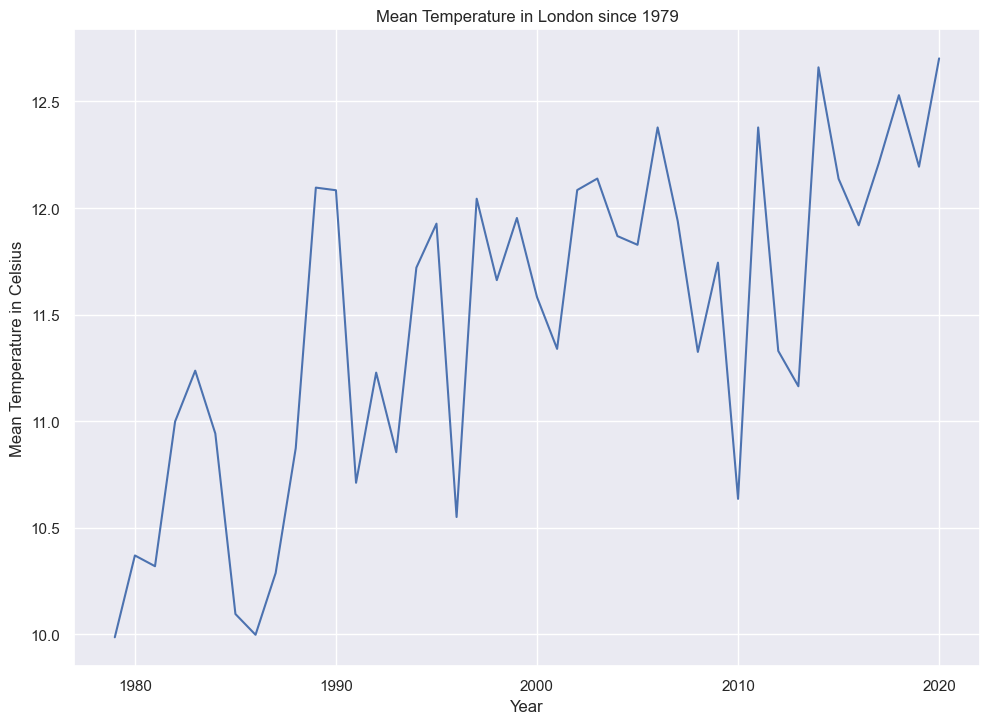

In [11]:
plot_weather(london_df, 'mean', 'mean_temp', 'Mean Temperature in London since 1979', 'Mean Temperature in Celsius', 'Year')

### Linear Regression


#### **Note:** It doesn't make too much sense to create a linear regression plot from the date to mean temperature because we already see the trend at which the temperature is going at. However when you have everyday into the graph, then it does make sense, but it still looks incredibly messy.


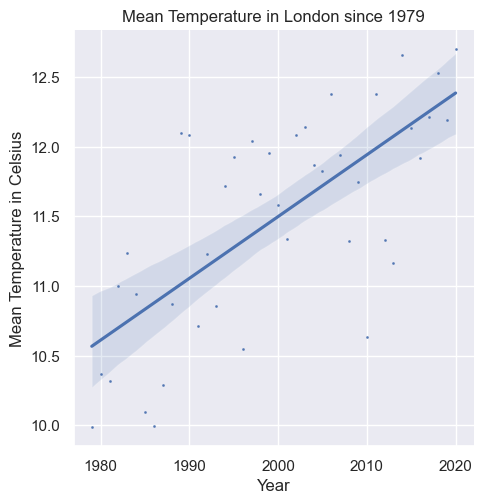

In [12]:
plot_weather_with_regression(london_df, 'mean', 'mean_temp', 'Mean Temperature in London since 1979', 'Mean Temperature in Celsius', 'Year')

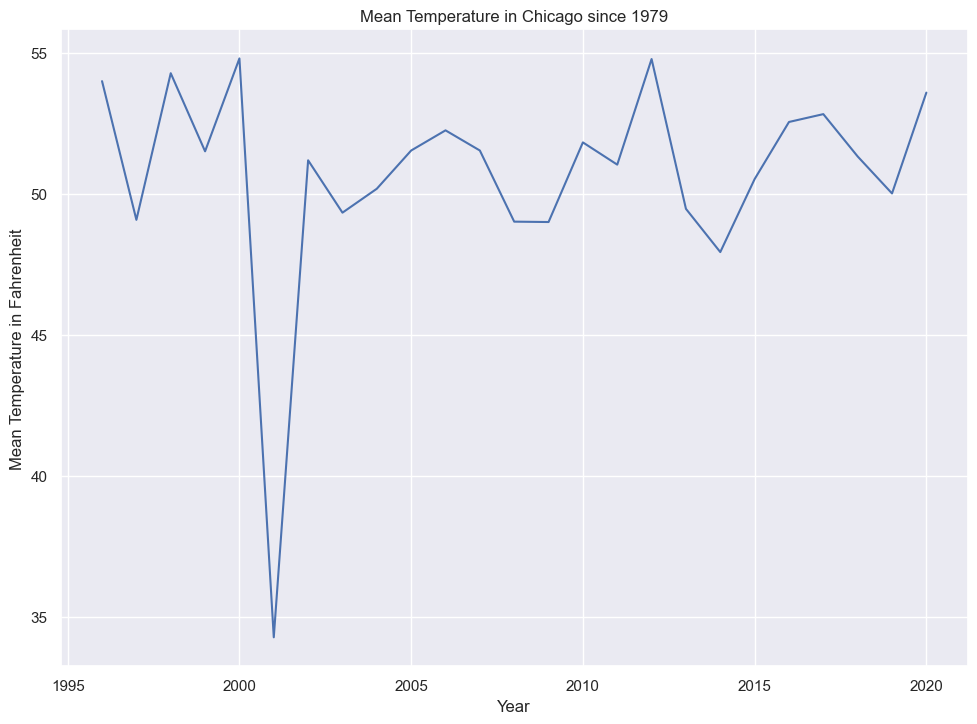

In [13]:
plot_weather(process_chicago_data(chicago_df, "DailyAverageDryBulbTemperature"), 'mean', 'DailyAverageDryBulbTemperature', 'Mean Temperature in Chicago since 1979', 'Mean Temperature in Fahrenheit', 'Year')

#### **Note:** The author's conclusion is really wrong. It is saying 2/3 degrees, when even in this person's graph, it is clear that the average temperature rose more than that. It is especially clear here that the average temperature rose close to 2 degrees in celsius.

## Min temperature

#### **Note:** The author's statement is incorrect because they can't see the data clearly enough to know that the temperature should be increasing year by year. It is also impossible to expect even if you know that the average temperature was increasing year by year because this is the minimum temperature.


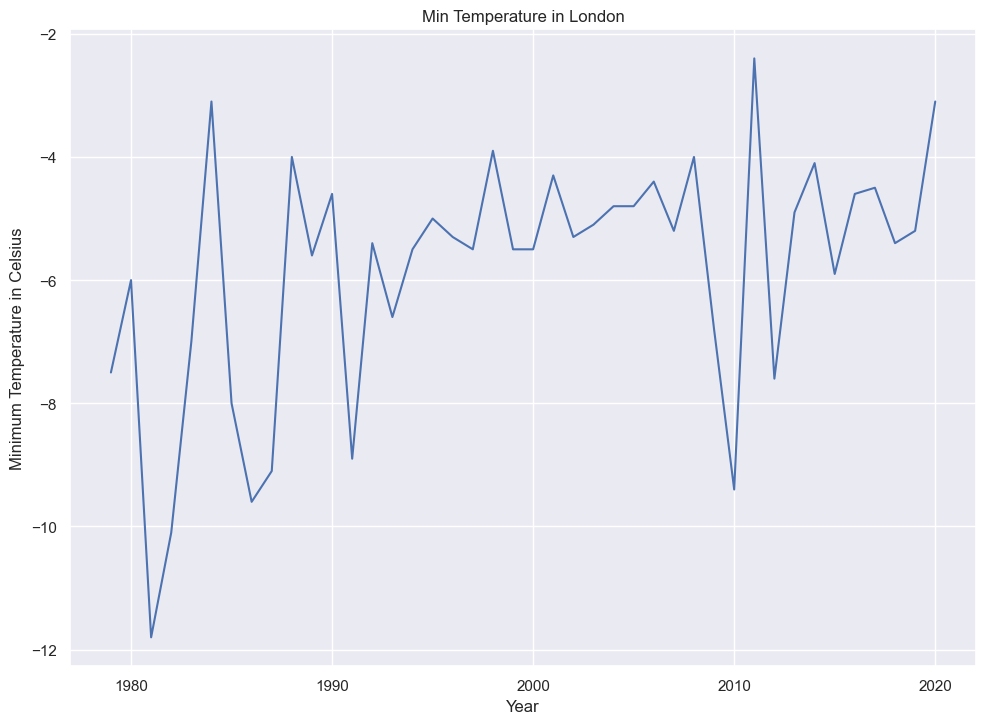

In [14]:
plot_weather(london_df, 'min', 'min_temp', 'Min Temperature in London', 'Minimum Temperature in Celsius', 'Year')

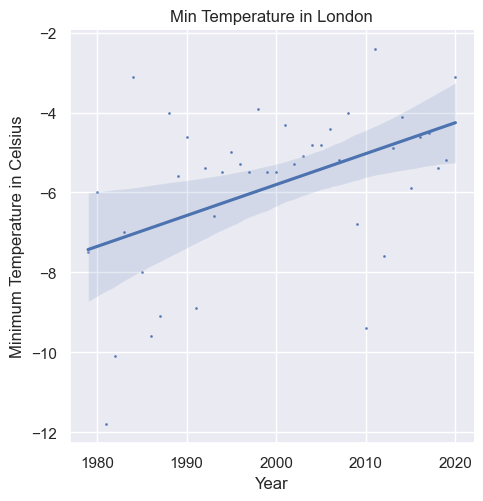

In [15]:
plot_weather_with_regression(london_df, 'min', 'min_temp', 'Min Temperature in London', 'Minimum Temperature in Celsius', 'Year')

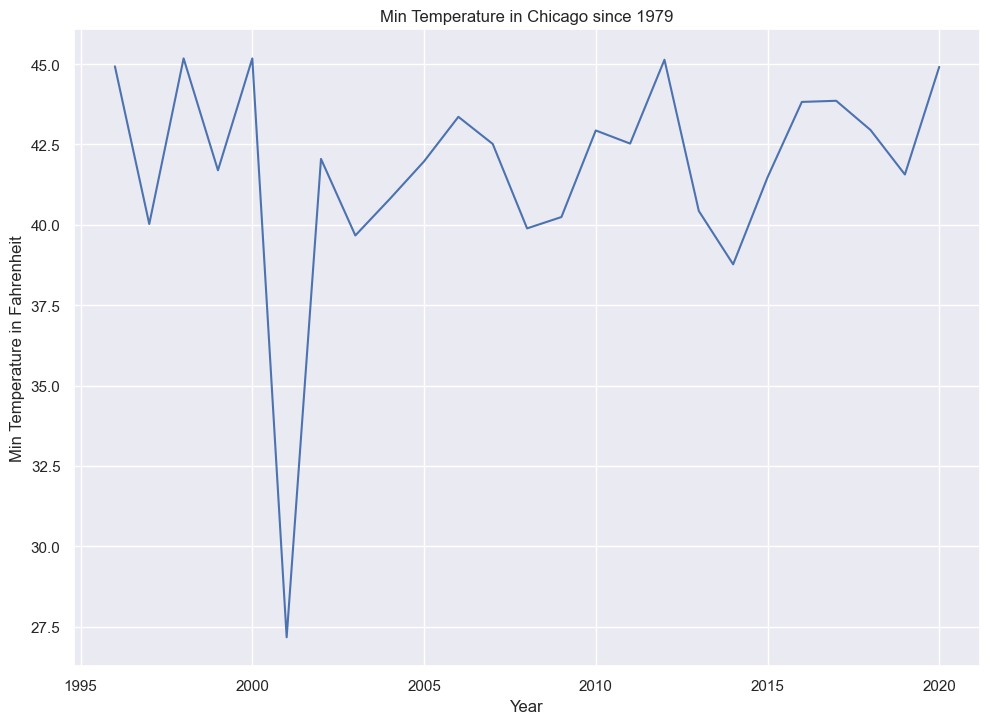

In [16]:
plot_weather(process_chicago_data(chicago_df, "DailyMinimumDryBulbTemperature"), 'mean', 'DailyMinimumDryBulbTemperature', 'Min Temperature in Chicago since 1979', 'Min Temperature in Fahrenheit', 'Year')

#### **Note:** Once again the author is incorrect, it is not 2/3 degrees. It is closer to 2 degrees.

## Max temperature


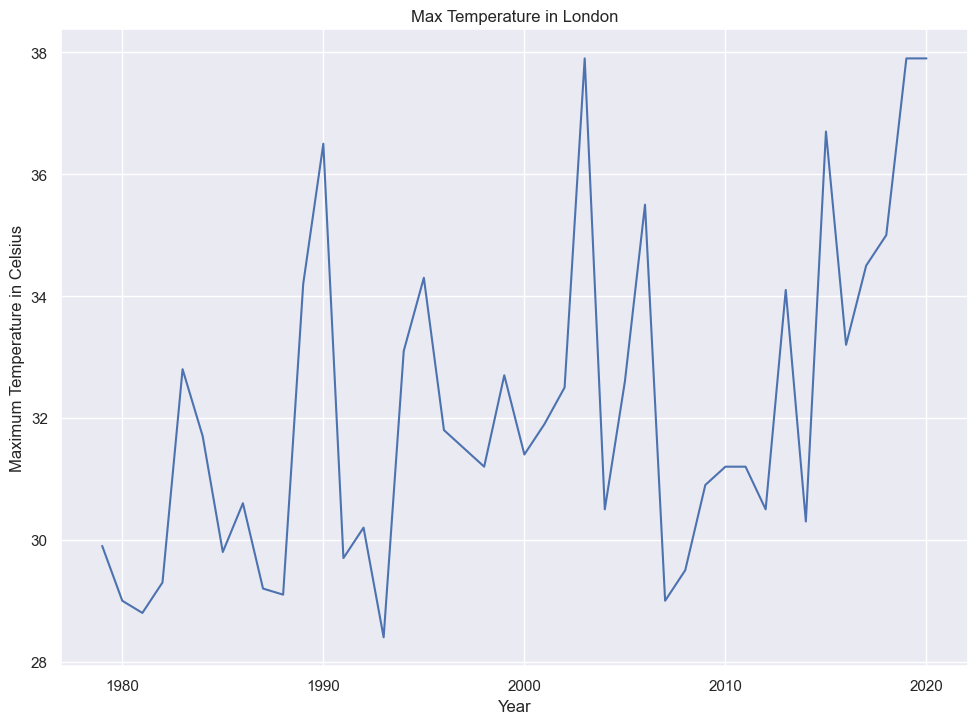

In [17]:
plot_weather(london_df, 'max', 'max_temp', 'Max Temperature in London', 'Maximum Temperature in Celsius', 'Year')

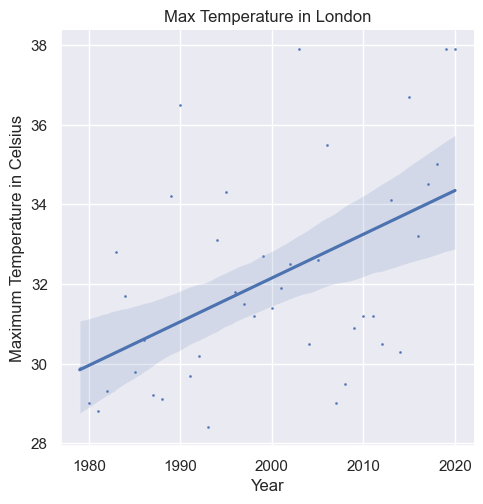

In [18]:
plot_weather_with_regression(london_df, 'max', 'max_temp', 'Max Temperature in London', 'Maximum Temperature in Celsius', 'Year')

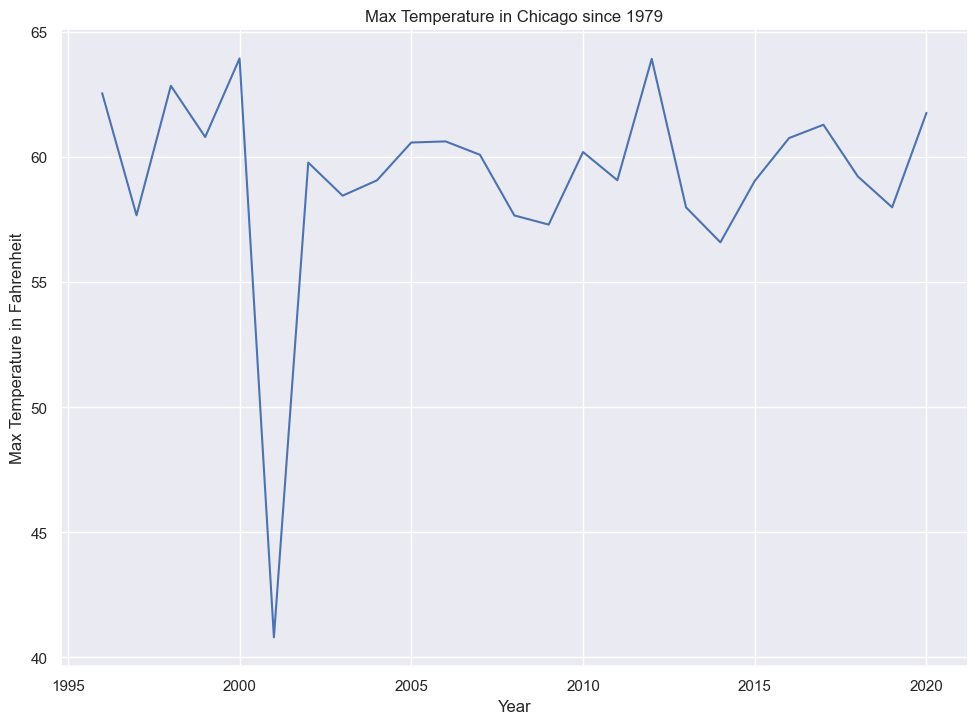

In [19]:
plot_weather(process_chicago_data(chicago_df, "DailyMaximumDryBulbTemperature"), 'mean', 'DailyMaximumDryBulbTemperature', 'Max Temperature in Chicago since 1979', 'Max Temperature in Fahrenheit', 'Year')

#### **Note:** The author was not incorrect, but something interesting to note is that the temperature here was raised by a little more than 4 degrees celsius.


## Precipitation


Hypothesis: Precipitation increases


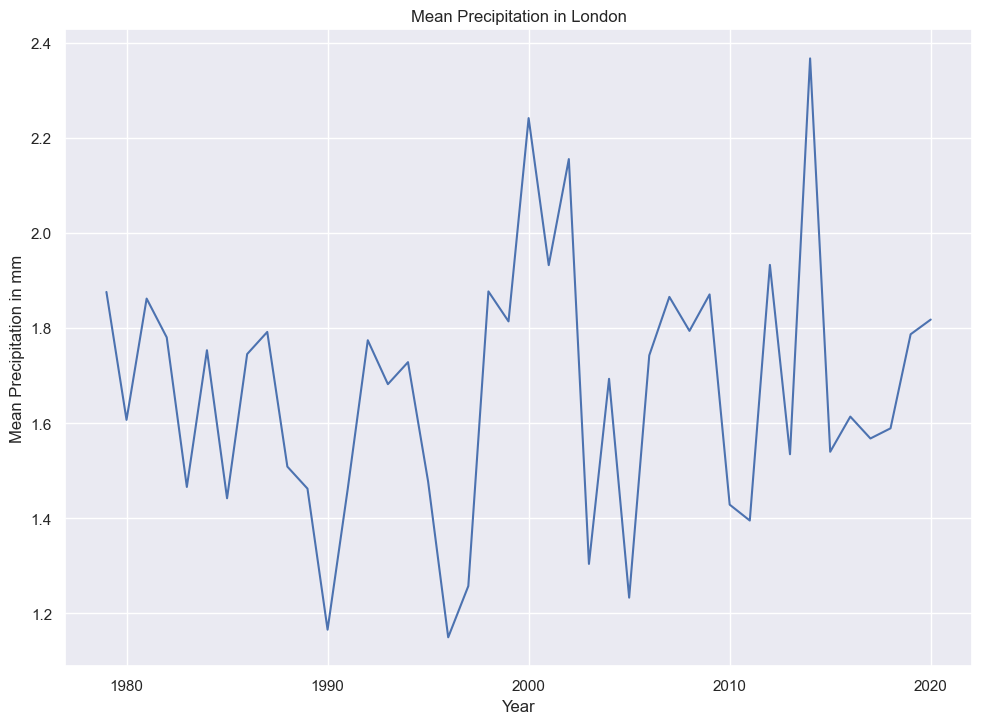

In [20]:
plot_weather(london_df, 'mean', 'precipitation', 'Mean Precipitation in London', 'Mean Precipitation in mm', 'Year')

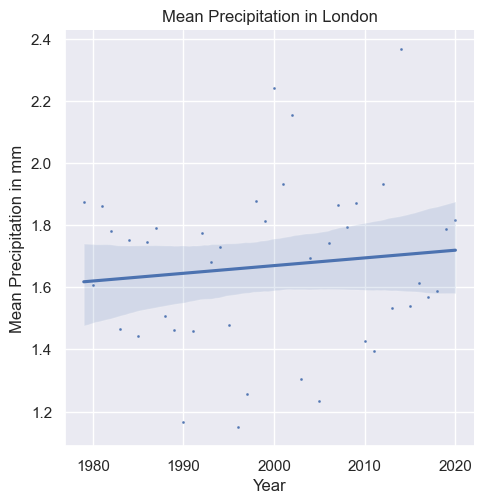

In [21]:
plot_weather_with_regression(london_df, 'mean', 'precipitation', 'Mean Precipitation in London', 'Mean Precipitation in mm', 'Year')

In [22]:
sq_km_london = 1572
sq_meter_london = sq_km_london * 1000
increase_in_precipaitation = .1
liter_per_sq_meter = 1
increase = sq_meter_london * .1
liter_to_gallon = .2641720524
liters_in_london = increase * liter_per_sq_meter
gallons_in_london = liters_in_london * liter_to_gallon
print("Liters in London: ", liters_in_london, " Gallons in London: ", gallons_in_london)

Liters in London:  157200.0  Gallons in London:  41527.84663728


#### **Note:** Although the precipitation doesn't seem like a lot, there still is another 41,527 gallons of water that rained on London.

## Snow Melted


Hypothesis: Snow melted will increase.


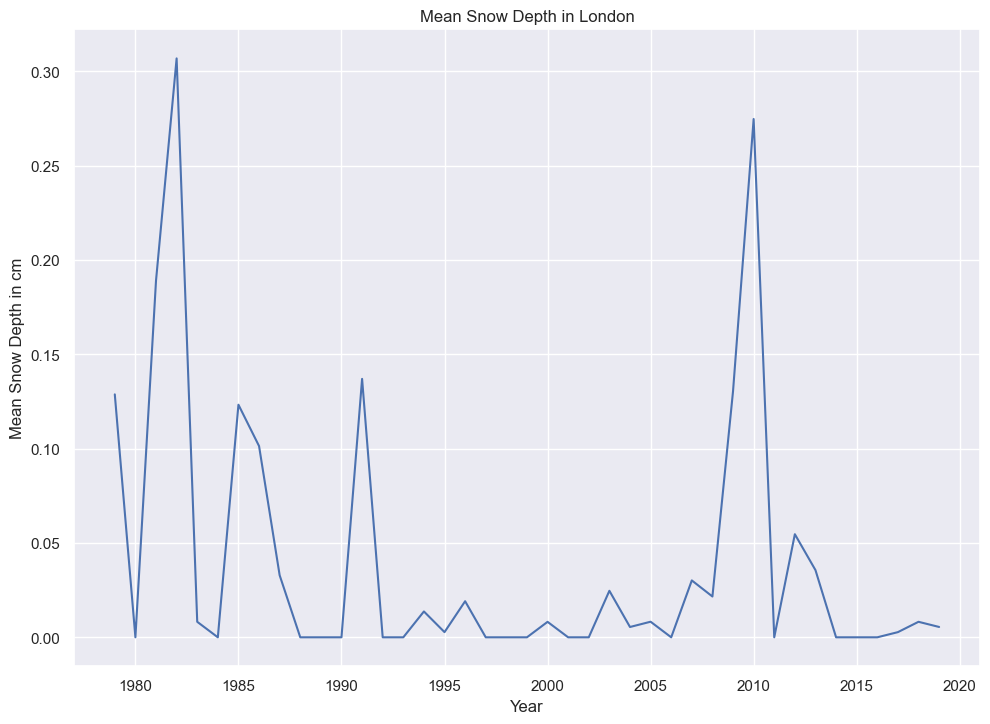

In [23]:
plot_weather(london_df, 'mean', 'snow_depth', 'Mean Snow Depth in London', 'Mean Snow Depth in cm', 'Year', 'line')

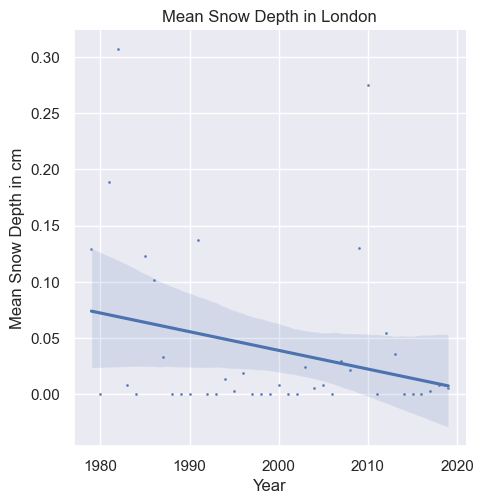

In [24]:
plot_weather_with_regression(london_df, 'mean', 'snow_depth', 'Mean Snow Depth in London', 'Mean Snow Depth in cm', 'Year')

#### **Note:** I would have to disagree with the author's conclusion because we see the average depth of snow getting closer to zero. I think we are seeing the results of climate change. I think perhaps that the original author of the notebook may have not thought so because his data was stretched with outliers, not being able to see the insight.

## Radiation


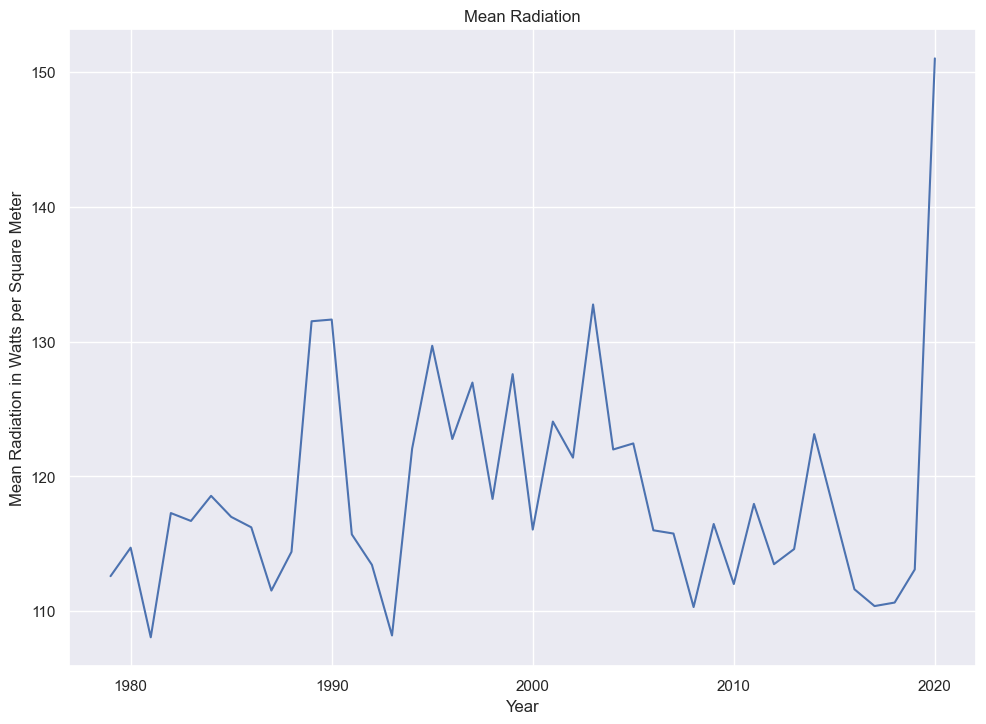

In [25]:
plot_weather(london_df, 'mean', 'global_radiation', 'Mean Radiation', 'Mean Radiation in Watts per Square Meter', 'Year')

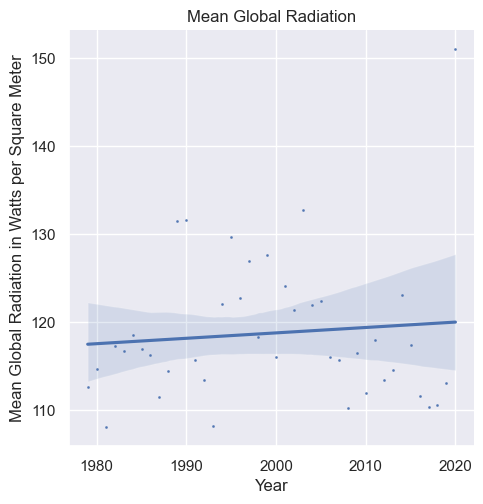

In [26]:
plot_weather_with_regression(london_df, 'mean', 'global_radiation', 'Mean Global Radiation', 'Mean Global Radiation in Watts per Square Meter', 'Year')

#### We can notice a slight increase of the global radiations but nothing very important.

#### **Note:** Since it's hard for them to see the data clearly, they can't tell that there was a huge spike in 2020 for global radiation. Similarly, the regression line doesn't show that finding as well either.

## Sunshine


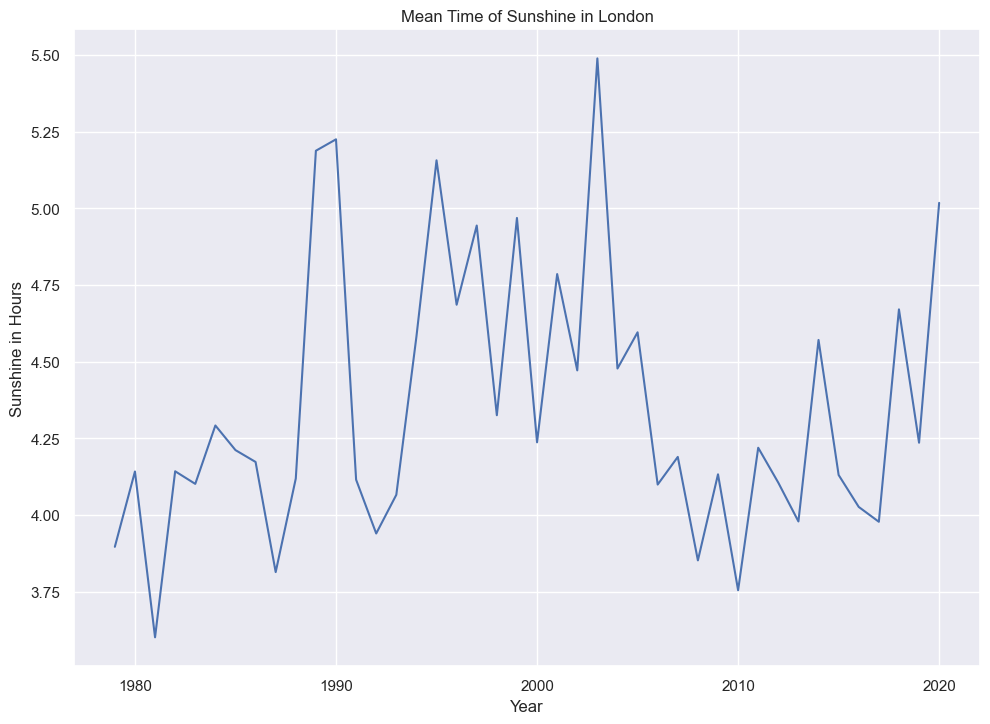

In [27]:
plot_weather(london_df, 'mean', 'sunshine', 'Mean Time of Sunshine in London', 'Sunshine in Hours', 'Year')

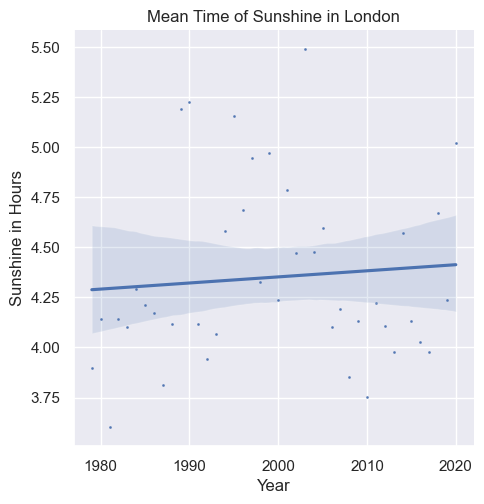

In [28]:
plot_weather_with_regression(london_df, 'mean', 'sunshine', 'Mean Time of Sunshine in London', 'Sunshine in Hours', 'Year')

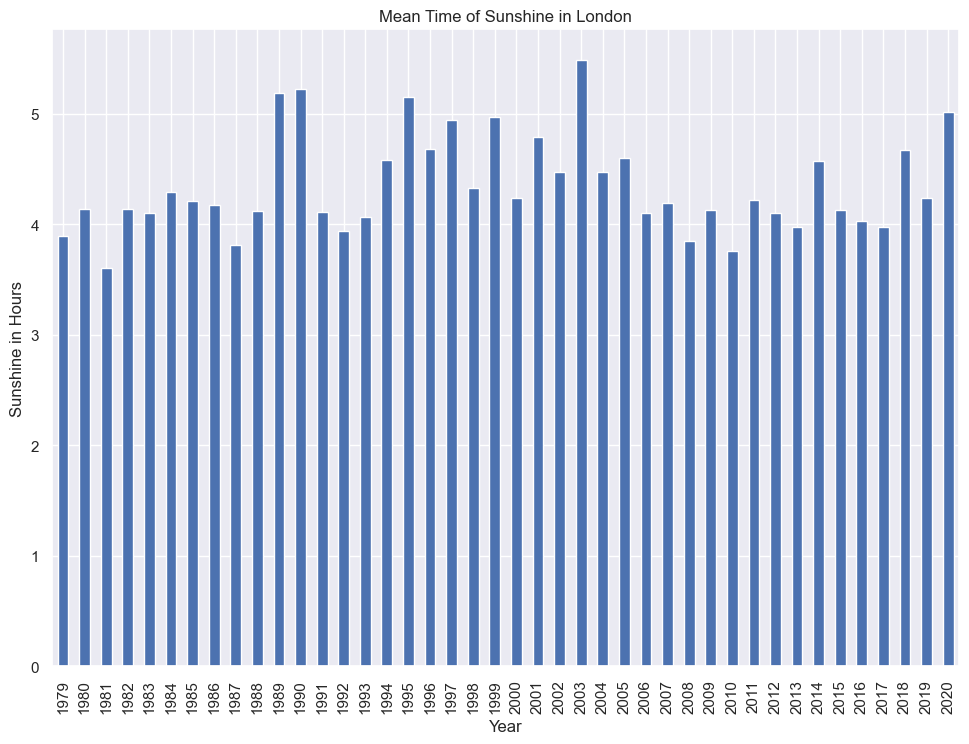

In [29]:
plot_weather(london_df, 'mean', 'sunshine', 'Mean Time of Sunshine in London', 'Sunshine in Hours', 'Year', 'bar')

#### **Note:** We see the mean time in sunshine changing by an hour or two over the years, going up and down, affecting the regression line to be flatter.

## Cloud Cover

#### Sky conditions are estimated in terms of how many eighths of the sky are covered in cloud, ranging from 0 oktas (completely clear sky) through to 8 oktas (completely overcast).

- 0 oktas (SKC): Sky clear — Fine
- 1 okta (FEW, Few clouds): 1/8 of the sky covered or less, but not zero — Fine
- 2 oktas (FEW): 2/8 of the sky covered — Fine
- 3 oktas (SCT, Scattered clouds): 3/8 of the sky covered — Partly Cloudy
- 4 oktas (SCT): 4/8 of the sky covered — Partly Cloudy
- 5 oktas (BKN, Broken clouds): 5/8 of the sky covered — Partly Cloudy
- 6 oktas (BKN): 6/8 of the sky covered — Cloudy
- 7 oktas (BKN): 7/8 of sky covered or more, but not 8/8 — Cloudy
- 8 oktas (OVC): 8/8 of sky completely covered, no breaks — Overcast


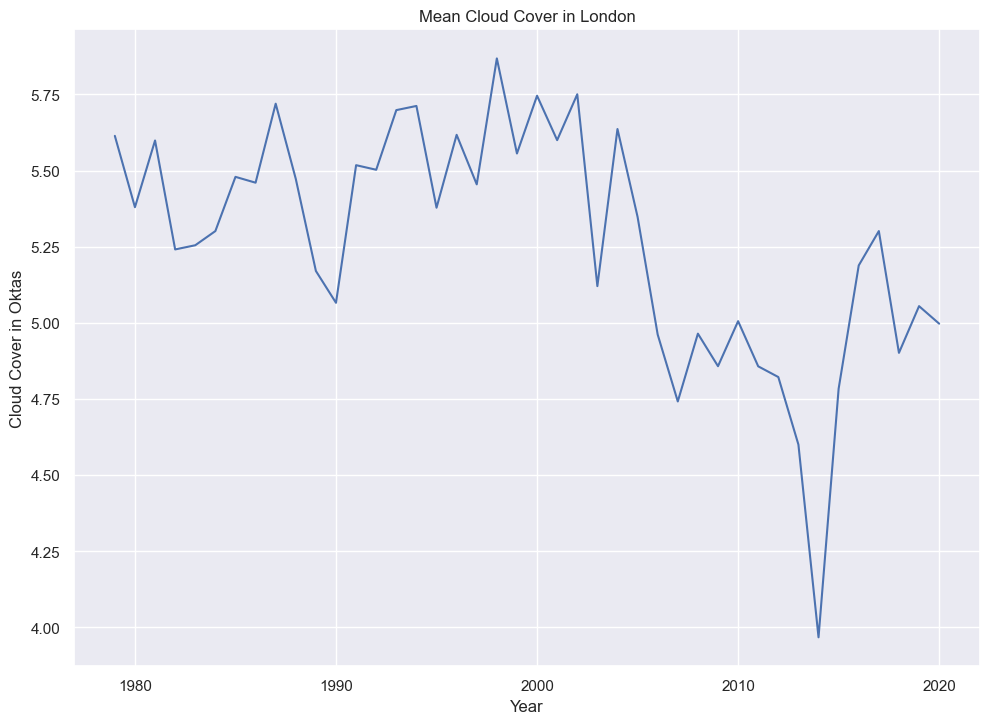

In [30]:
plot_weather(london_df, 'mean', 'cloud_cover', 'Mean Cloud Cover in London', 'Cloud Cover in Oktas', 'Year')

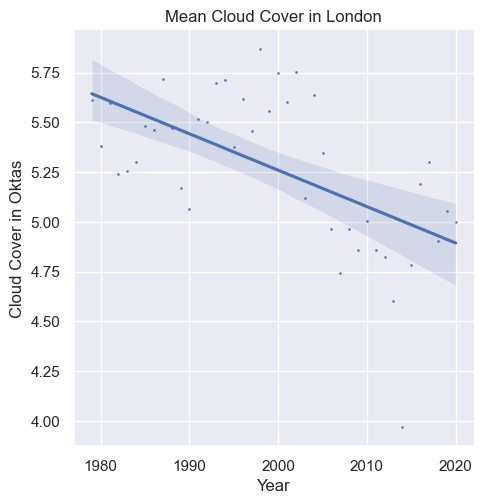

In [31]:
plot_weather_with_regression(london_df, 'mean', 'cloud_cover', 'Mean Cloud Cover in London', 'Cloud Cover in Oktas', 'Year')

#### **Note:** Better wording for the author wouldn't be year after year, but as time progresses, it does seem to be less cloud cover.

## Atmospheric Pressure


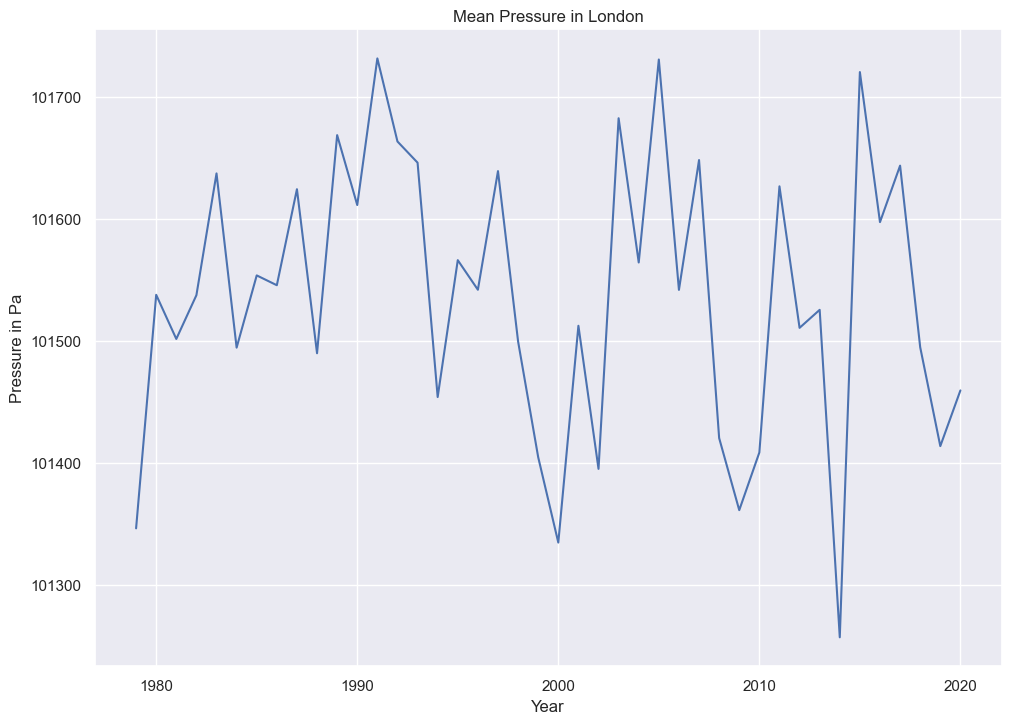

In [32]:
plot_weather(london_df, 'mean', 'pressure', 'Mean Pressure in London', 'Pressure in Pa', 'Year')

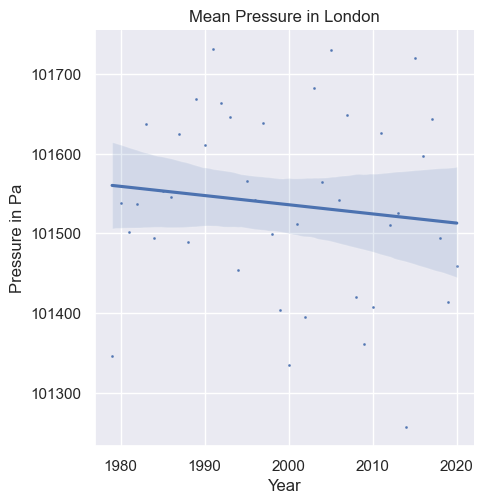

In [33]:
plot_weather_with_regression(london_df, 'mean', 'pressure', 'Mean Pressure in London', 'Pressure in Pa', 'Year')

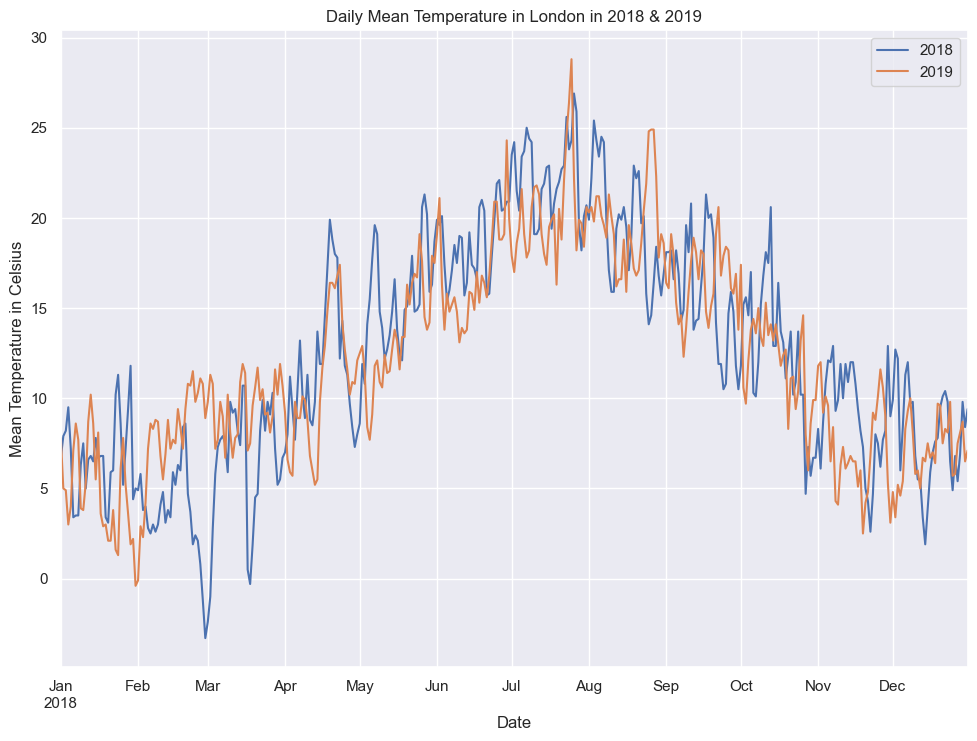

In [34]:
compare_years(london_df, [2018, 2019], 'mean_temp', 'Daily Mean Temperature in London in 2018 & 2019', 'Mean Temperature in Celsius', 'Date')

#### **Note:** Standard pressure is 101,325 Pascals, so I would have to agree, not too much interesting here.

# Conclusions

##### - The temperature has risen around 2 degrees over the past 40 years.

##### - The precipitation rose in about .2 mm, equating to around 41,527 gallons.

##### - The snow depth is decreasing towards the value of zero.

##### - Cloud coverage has been decreasing.

##### - Amount of sunshine in hours keeps spiking up and down each year.

##### - The pressure seems to be the same
